# Experiment: Fit Prev Violation Stimulus Interactions

**Goal**: Fit a model that has interaction terms between the filtered previous violation history and stimulus (sa, sb) values.


> Written by Jess Breda 

## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment
from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorInteractions
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizer
from multiglm.utils.fitting_utils import create_violation_interaction_pairs
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [10]:
model_config = {
    "filter_prev_violation_stim_itrx": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorInteractions,
        "filter_implementation": {
            "prev_violation": 1
        },  # filter column with animals tau,
        "design_matrix_generator_args": {
            "interaction_pairs": create_violation_interaction_pairs(["s_a", "s_b"])
        },
    },
}

params = {
    "animals": ANIMAL_IDS,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
}

save_name = "2024_02_19_fit_filtered_prev_violation_stim_itrx.pkl"
order = [
    "bias",
    "prev_violation_exp",
    "s_a",
    "prev_violation_exp_x_s_a",
    "s_b",
    "prev_violation_exp_x_s_b",
    "prev_sound_avg",
    "prev_correct",
    "prev_choice",
]

## Run

In [4]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<

 ***** evaluating model filter_prev_violation_stim_itrx w/ sigma 0.07 *****
         Current function value: 64737.946312
         Iterations: 33
         Function evaluations: 127
         Gradient evaluations: 109

 ***** evaluating model filter_prev_violation_stim_itrx w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64420.545519
         Iterations: 32
         Function evaluations: 79
         Gradient evaluations: 78

 ***** evaluating model filter_prev_violation_stim_itrx w/ sigma 0.25 *****
         Current function value: 64312.632101
         Iterations: 30
         Function evaluations: 118
         Gradient evaluations: 104

 ***** evaluating model filter_prev_violation_stim_itrx w/ sigma 0.5 *****


## Visualize

In [5]:
palette = "Set2"

# experiment = load_experiment(save_name)
mv = ModelVisualizer(experiment)

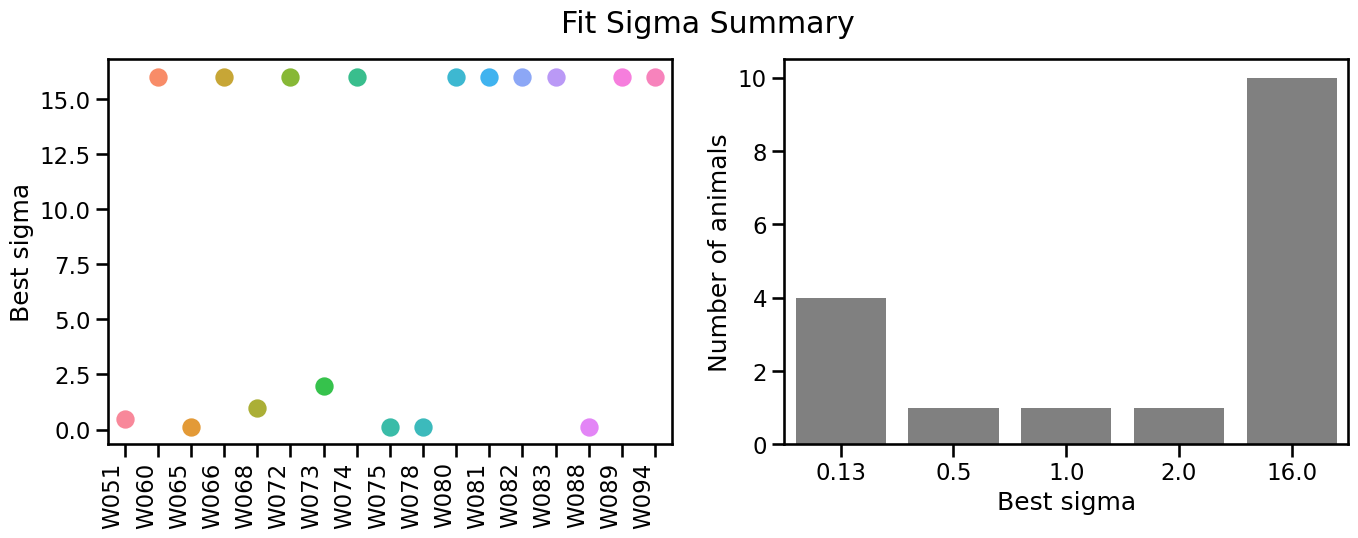

In [6]:
mv.plot_sigma_summary()

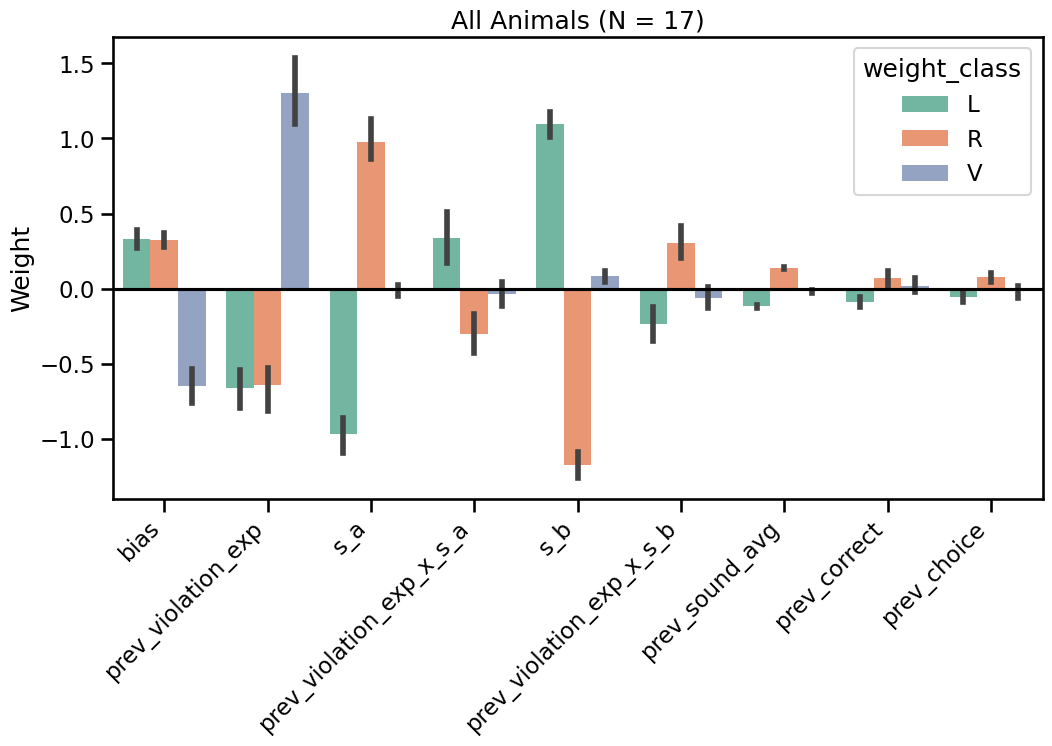

In [11]:
mv.plot_weights_summary(palette=palette, order=order)

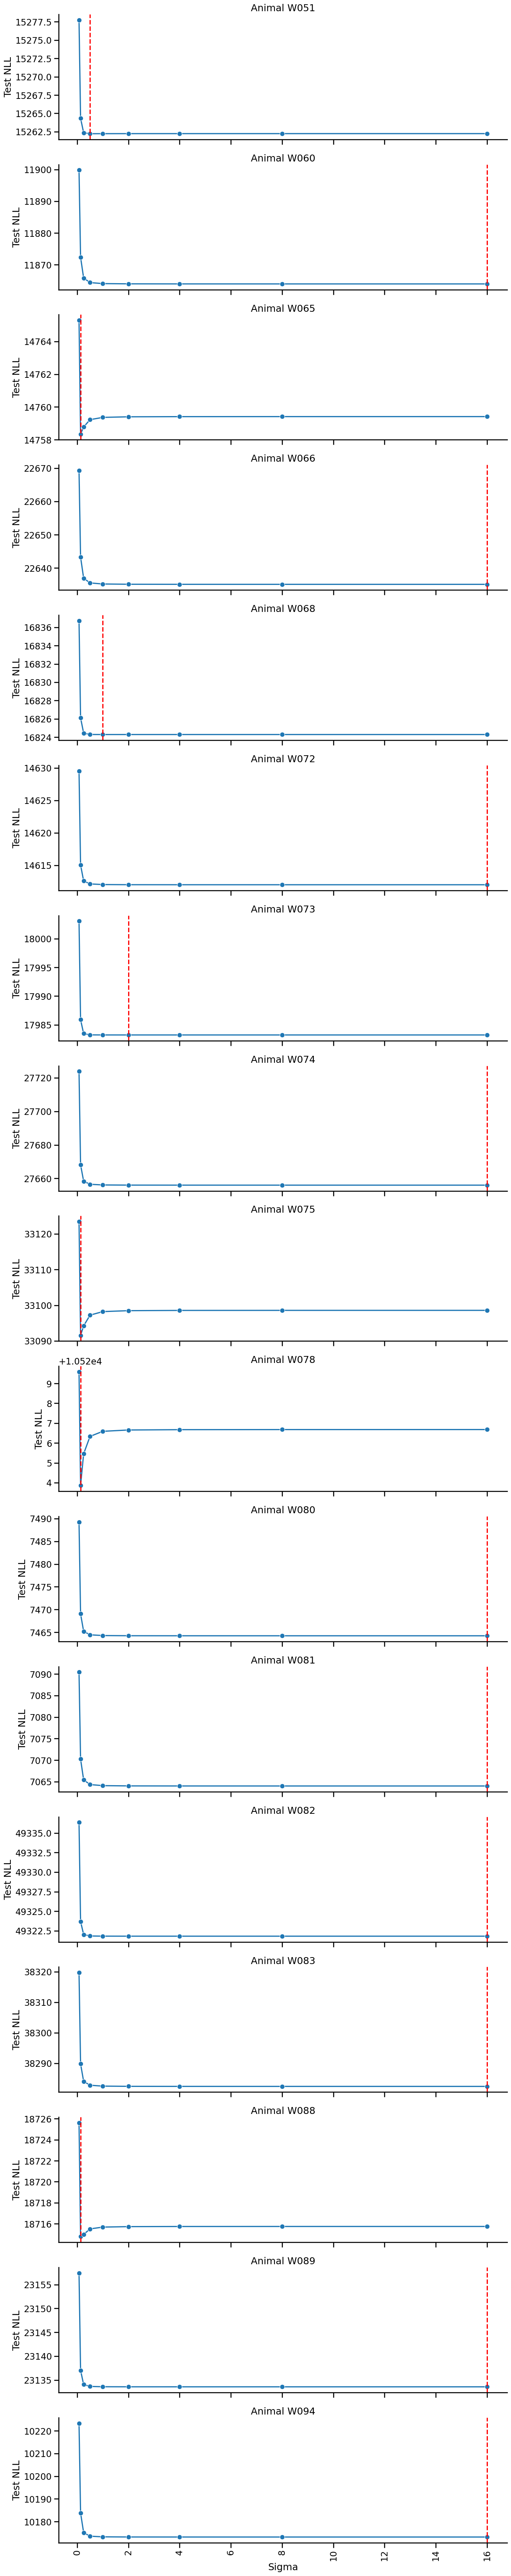

In [8]:
mv.plot_nll_over_sigmas_by_animal()

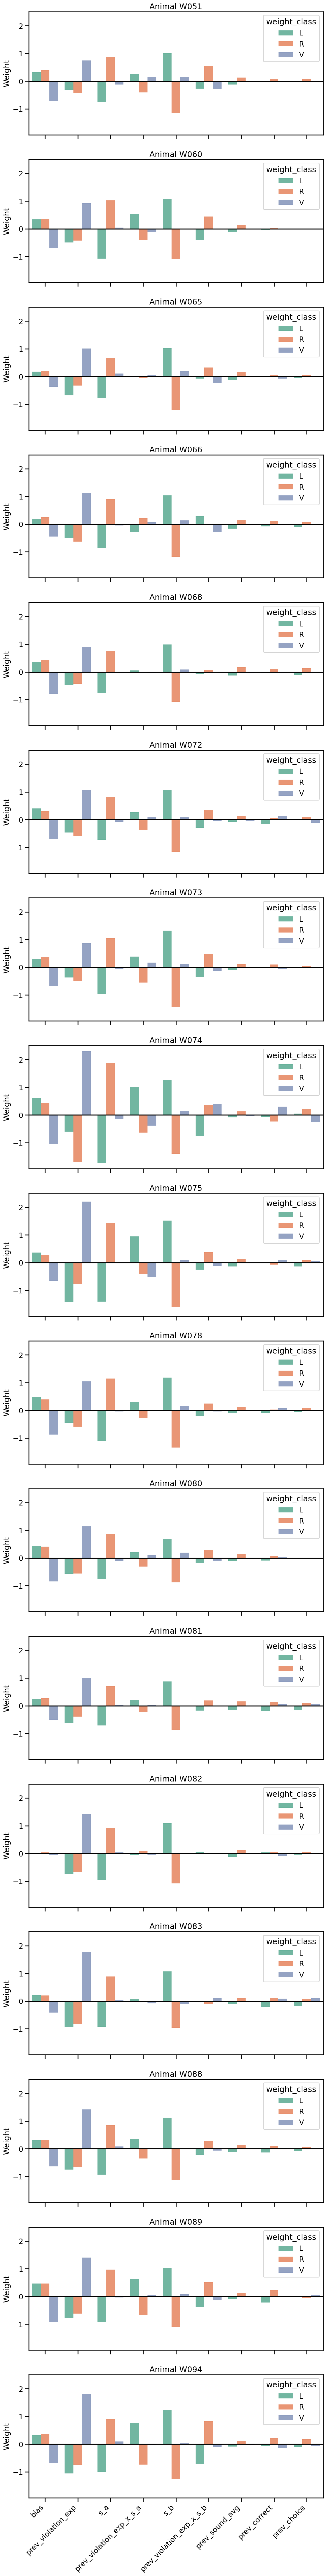

In [12]:
mv.plot_weights_by_animal(palette=palette, order=order)